# **Heart Disease Prediction Notebook**

**Import Libraries**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

# Display plots in notebook
%matplotlib inline

**Load the Dataset**

In [41]:
# Load the Dataset
df = pd.read_csv('HeartDisease.csv')

# Preview data
df.head()


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


**Inspect Data**

In [42]:
# Dataset structure
df.info()

# Missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

**Clean and Encode Data**

In [43]:
# Check categorical columns
cat_cols = df.select_dtypes(include='object').columns
print("Categorical columns:", cat_cols)

# For modeling, convert categorical to numeric
# using pandas factorize (label encoding)
for col in cat_cols:
    df[col] = pd.factorize(df[col])[0]

# Confirm
df.head()

Categorical columns: Index(['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg',
       'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy',
       'thalassemia'],
      dtype='object')


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,0,0,125,212,0,0,168,0,1.0,0,0,0,0
1,53,0,0,140,203,1,1,155,1,3.1,1,1,0,0
2,70,0,0,145,174,0,0,125,1,2.6,1,1,0,0
3,61,0,0,148,203,0,0,161,0,0.0,0,2,0,0
4,62,1,0,138,294,1,0,106,0,1.9,2,3,1,0


**EDA - Overall Heatmap**

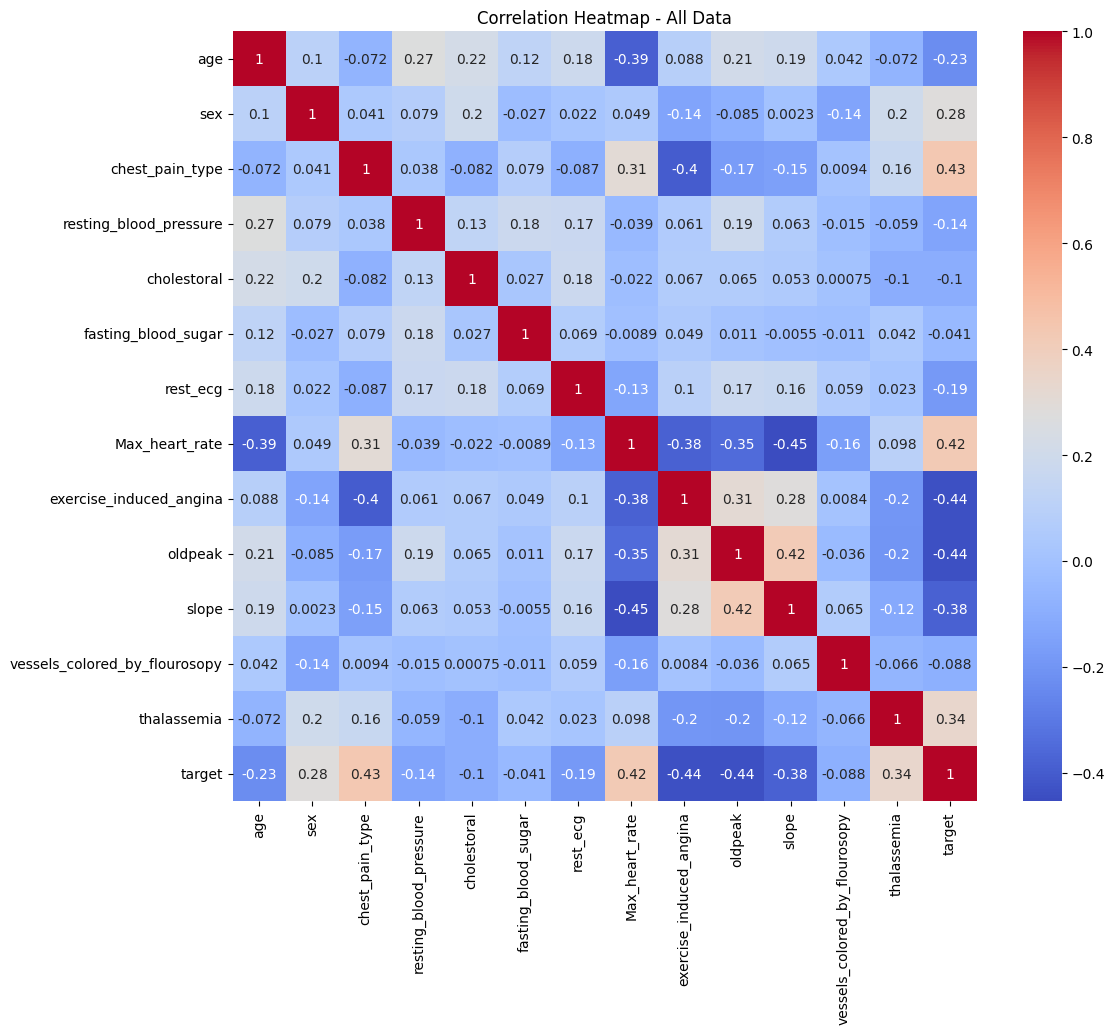

In [44]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap - All Data")
plt.show()

**EDA - Separate Heatmaps for Males and Females**

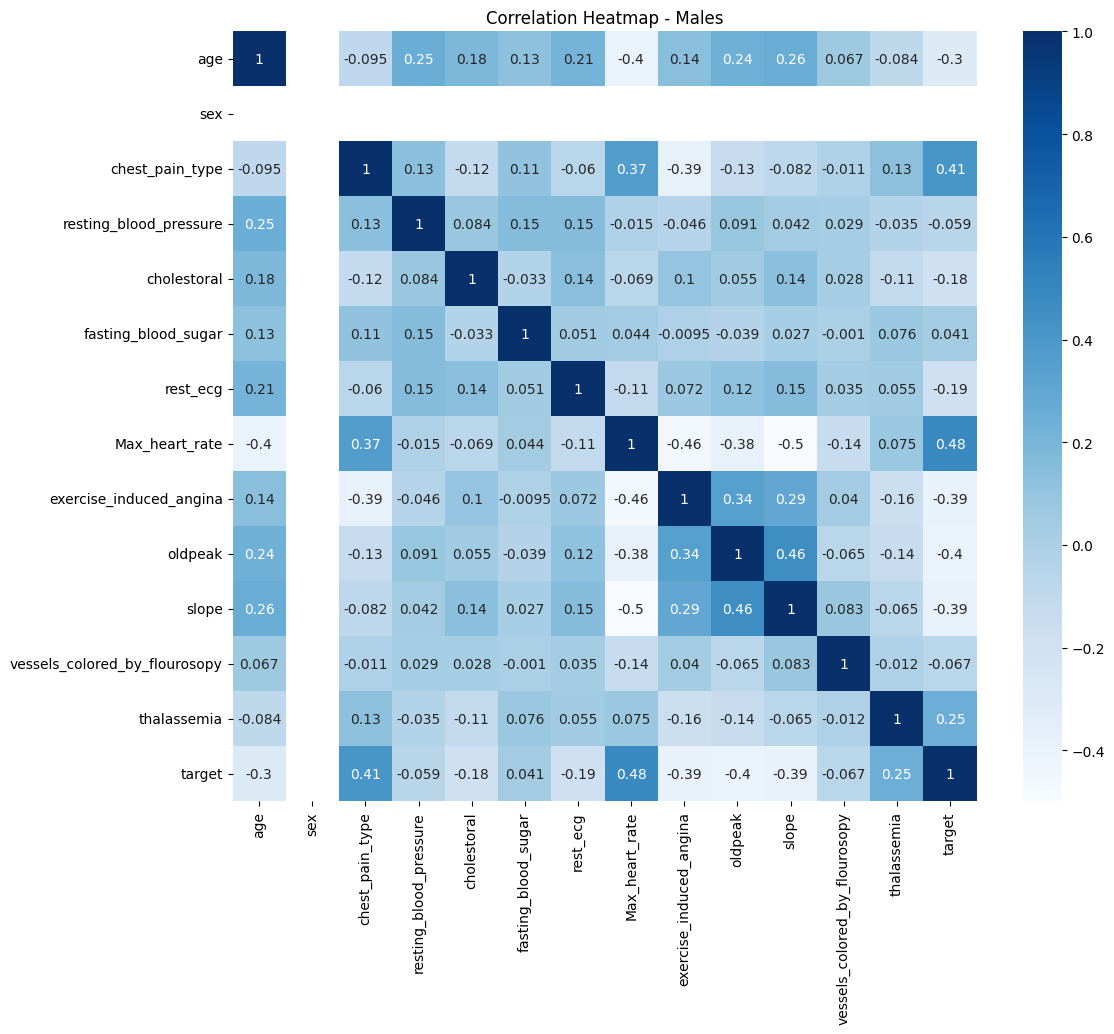

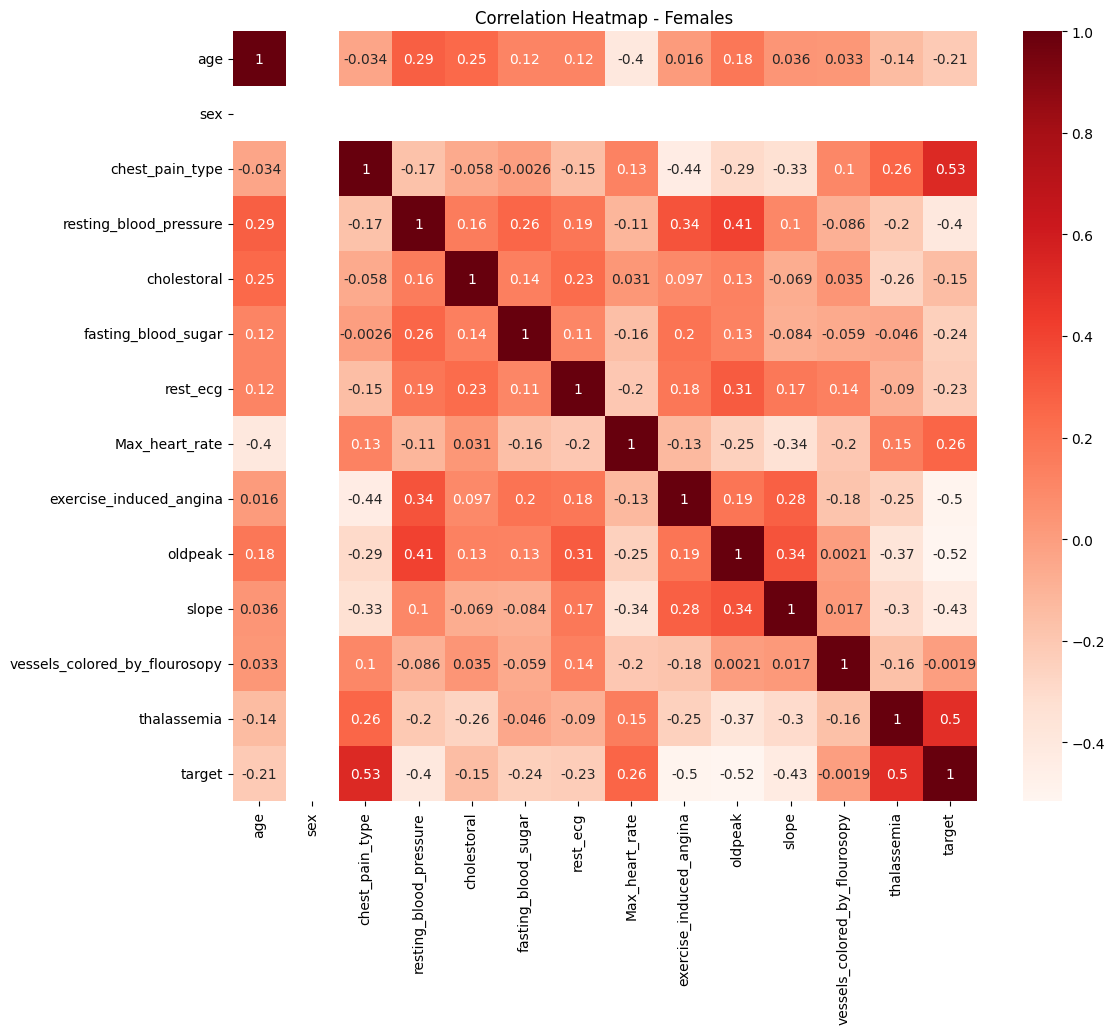

In [45]:
# Assume 0=Male, 1=Female
df_male = df[df['sex'] == 0]
df_female = df[df['sex'] == 1]

plt.figure(figsize=(12,10))
sns.heatmap(df_male.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap - Males")
plt.show()

plt.figure(figsize=(12,10))
sns.heatmap(df_female.corr(), annot=True, cmap="Reds")
plt.title("Correlation Heatmap - Females")
plt.show()

**Prepare Train-Test Split**

In [46]:
# Separate input features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Train Logistic Regression Model**

In [47]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

**Evaluate Model**

Logistic Regression Accuracy: 0.78


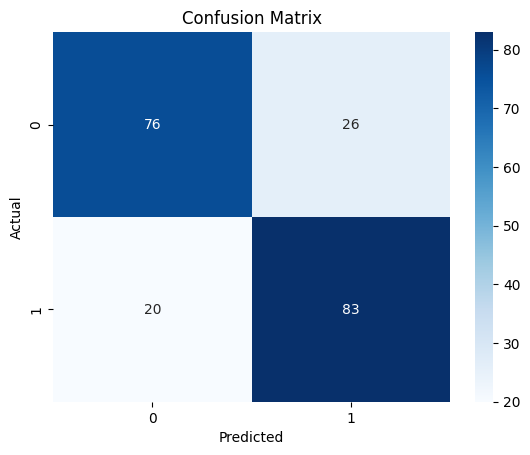

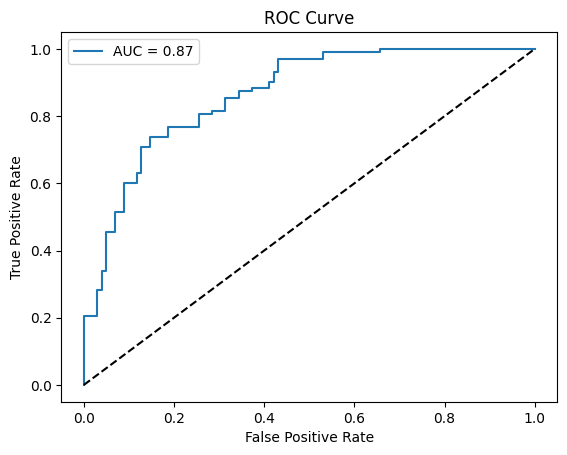

In [48]:
# Predictions
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:,1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


**Feature Importance**

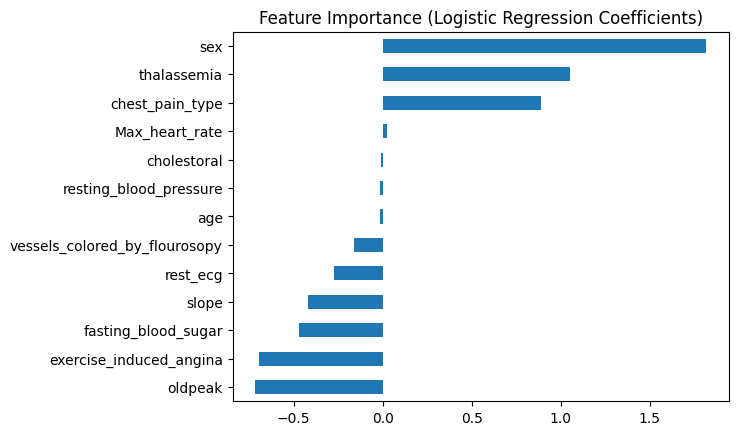

In [49]:
# Coefficients as feature importance
importance = pd.Series(logreg.coef_[0], index=X.columns)
importance.sort_values().plot(kind='barh')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()